## ロジスティック回帰
## 参考　https://enjoyworks.jp/tech-blog/3087

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# アイリスデータを使用
iris_dataset = load_iris()
df_iris = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 説明変数はsepal（がく片の長さと広さ）の２つを使用
X = iris_dataset.data[:,:2]
X[:4,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1]])

In [4]:
# 目的変数はターゲットに格納されており３種。これを「０」と「１か２」の２値分類にする。
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# ２値分類問題にするために、ターゲットを「０⇒０」と「１か２⇒１」の２つに変換
# 偽はゼロになるため、１をかけるとゼロになる。１か２は、真にあたるので１をかけると１になる。
y = (iris_dataset.target != 0) *1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

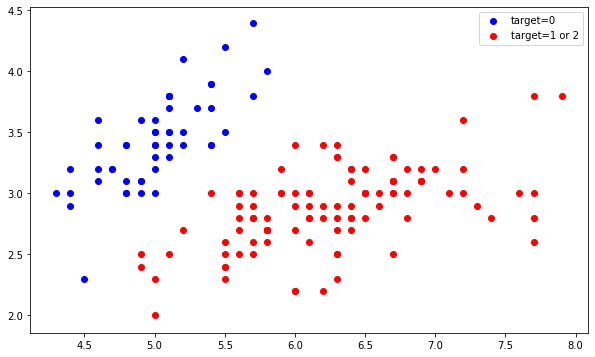

In [6]:
# データを可視化
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1], c='blue' ,label ='target=0')
plt.scatter(X[y==1][:,0],X[y==1][:,1], c='red'  ,label ='target=1 or 2')
plt.legend()
plt.show()

In [7]:
# ロジスティック回帰を行う
# 学習率：lr, 
# イテレーション：num_iter,　
# 切片項を持たせるか否か： fit_intercept
# 処理中に誤差の経過を出力するか否か： verbose

$$
予測値　\hat{P_i} \quad = \quad h =\quad \sigma(\theta_0 + \theta_1 x_{i,1} + \theta_2 x_{i,2}+...+\theta_m x_{i,m}) = \sigma\quad(\boldsymbol{\theta}^T\quad\boldsymbol{\tilde{x}^T})\\
損失関数　E \quad = \quad - \sum \bigl({y_i\log h + (1-y)\log (1-h) \bigr)} $$

In [8]:
intercept = np.ones((X.shape[0],1))
a = np.concatenate((intercept,X),axis=1)
y.size

150

In [9]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # 切片を追加する。1の縦ベクトルを追加。よって特徴量は３つに。
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            #1万回ごとに誤差を出力    
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [10]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X, y)

preds = model.predict(X)
(preds == y).mean()

Wall time: 1min 3s


1.0

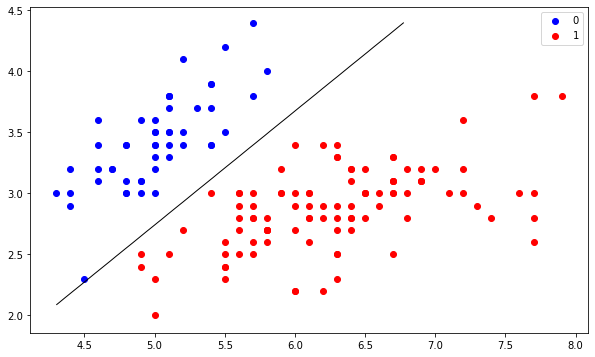

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [13]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])